# 1. Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Loading dataset

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
df = df.dropna() # helps remove the rows with missing values
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 3. Choosing numeric features for clustering

In [3]:
X = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


# 4. Quick correlation check

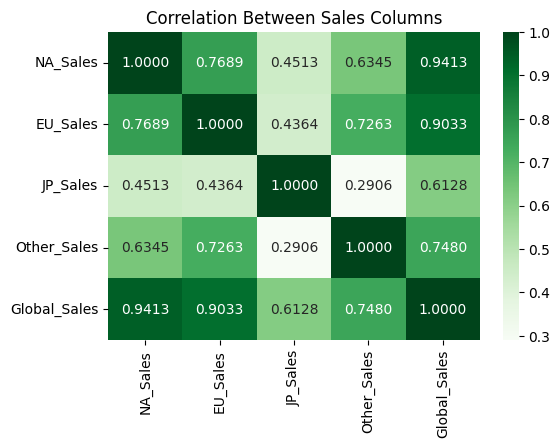

In [4]:
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap="Greens", fmt=".4f")
plt.title("Correlation Between Sales Columns")
plt.show()

# 5. Scaling the data

In [5]:
# Scaling the dta features so that each columns are treated equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Looking for a good number 

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

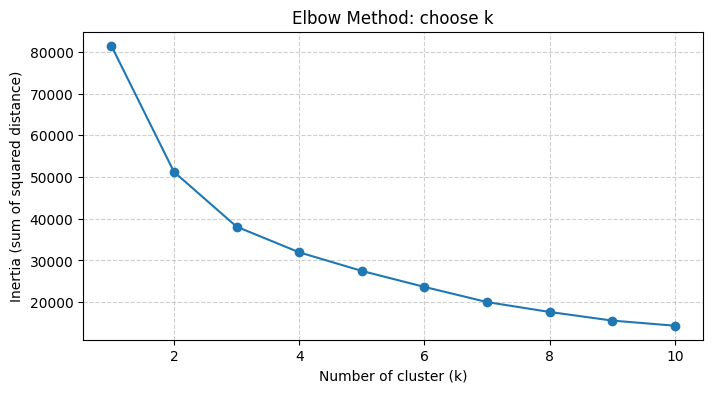

In [6]:
# Elbow method to choose k
inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of cluster (k)")
plt.ylabel("Inertia (sum of squared distance)")
plt.title("Elbow Method: choose k")
plt.grid(True,linestyle="--", alpha=0.6)
plt.show()

# 7. Training K-Means with a picked k

In [7]:
# Fitting KMeans with the chosen number of clusters
# Replacing n_clusters with whatever k are picked from the elbow plot
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Adding cluster labes for the original dataframe
df["Cluster"] = kmeans.labels_
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 8. How many games are in each cluster

Counts per cluster:
 Cluster
0    15603
1      641
2       46
3        1
Name: count, dtype: int64


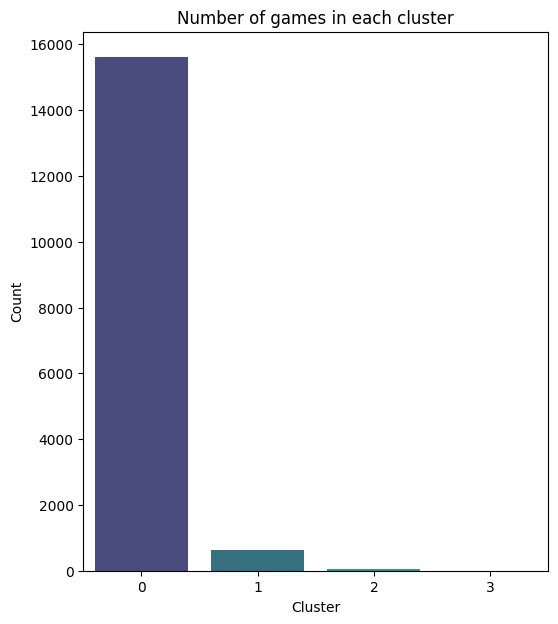

In [8]:
# Counting games per cluster
counts = df["Cluster"]. value_counts().sort_index()
print("Counts per cluster:\n", counts)

# Very simple bar chart
plt.figure(figsize=(6,7))
sns.countplot(x="Cluster", data=df, palette="viridis", order=range(k))
plt.title("Number of games in each cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# 9. Cluster Summary

In [9]:
# Average sales per cluster
cluster_summary = df.groupby("Cluster")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].mean().round(3)
cluster_summary

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Cluster,,,,,
0,0.169,0.084,0.051,0.027,0.332
1,1.899,1.280,0.551,0.419,4.149
2,9.298,5.388,2.853,1.859,19.398
3,41.490,29.020,3.770,8.460,82.740


# 10. Visualize the clusters

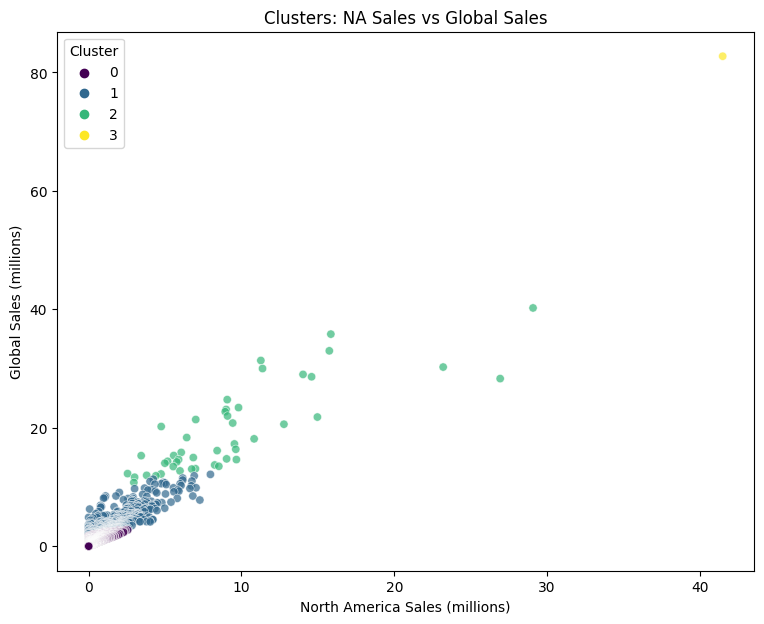

In [10]:
# Scattering all the plots for visualization clusters
plt.figure(figsize=(9,7))
sns.scatterplot(data=df, x="NA_Sales", y="Global_Sales", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("Clusters: NA Sales vs Global Sales")
plt.xlabel("North America Sales (millions)")
plt.ylabel("Global Sales (millions)")
plt.legend(title="Cluster")
plt.show()

# 11. Pairwise cluster plots 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

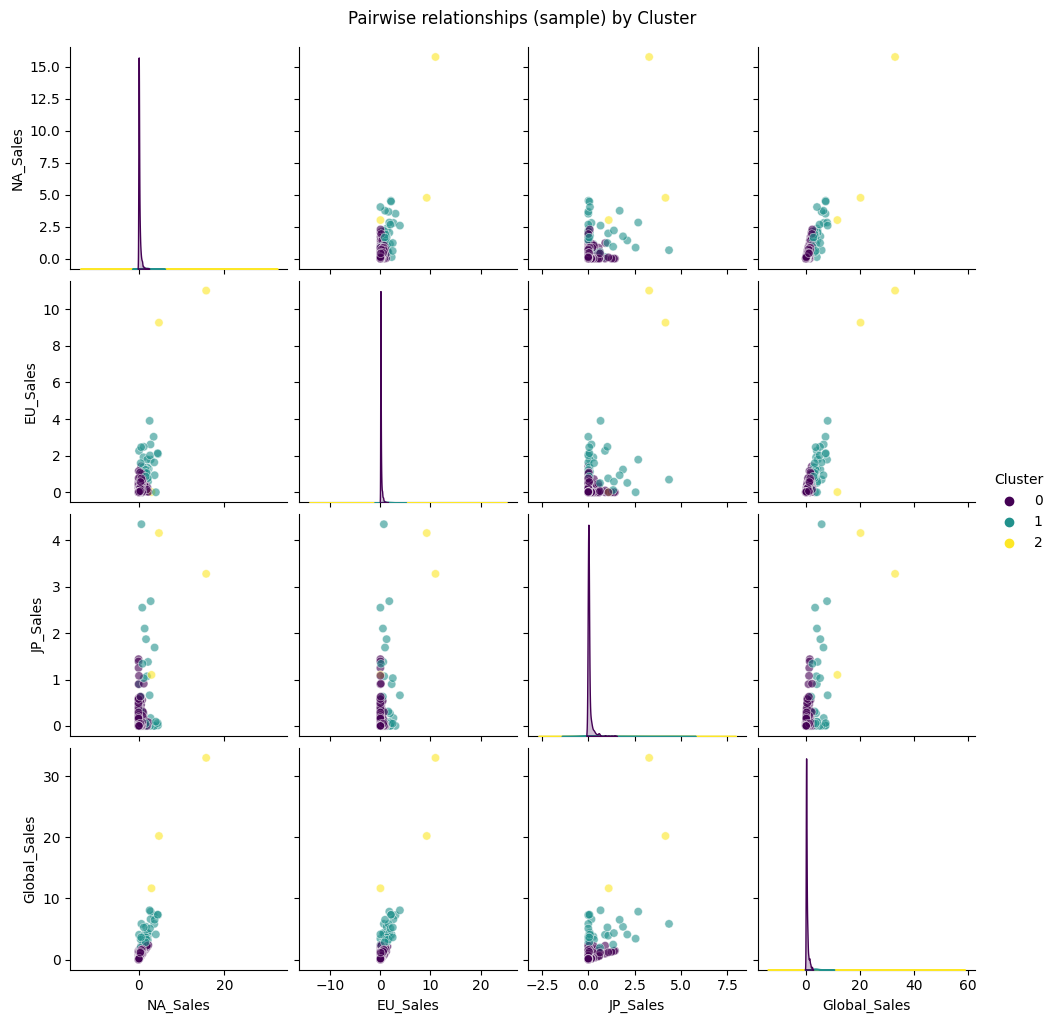

In [11]:
# Pairplot for a deeper comparison
sample = df.sample(n=1000, random_state=42)  # speeding it up
sns.pairplot(sample, vars=["NA_Sales","EU_Sales","JP_Sales","Global_Sales"], hue="Cluster", palette="viridis", plot_kws={'alpha':0.6})
plt.suptitle("Pairwise relationships (sample) by Cluster", y=1.02)
plt.show()

# 12. Showing example for every game per sales

In [12]:
# Sample game names from each cluster 
for i in range(k):
    print(f"\nCluster {i} sample games:")
    display(df[df["Cluster"]==i][["Name","Platform","Genre","Global_Sales"]].head(5))


Cluster 0 sample games:


,Name,Platform,Genre,Global_Sales
544,Missile Command,2600,Shooter,2.76
555,Madden NFL 12,X360,Sports,2.69
557,Madden NFL 11,X360,Sports,2.69
564,Mortal Kombat,GEN,Fighting,2.67
568,Fable,XB,Role-Playing,2.66



Cluster 1 sample games:


,Name,Platform,Genre,Global_Sales
43,Halo 3,X360,Shooter,12.14
46,Super Mario 64,N64,Platform,11.89
48,Super Mario Galaxy,Wii,Platform,11.52
49,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,11.33
50,Super Mario Land 2: 6 Golden Coins,GB,Adventure,11.18



Cluster 2 sample games:


,Name,Platform,Genre,Global_Sales
1,Super Mario Bros.,NES,Platform,40.24
2,Mario Kart Wii,Wii,Racing,35.82
3,Wii Sports Resort,Wii,Sports,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37
5,Tetris,GB,Puzzle,30.26



Cluster 3 sample games:


,Name,Platform,Genre,Global_Sales
0,Wii Sports,Wii,Sports,82.74


# 13. Additional things to add

In [13]:
# Adding a silhouette score
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Getting the cluster labels
labels = kmeans.labels_

# Calculating the silhouette score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", round(score, 3))

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.845


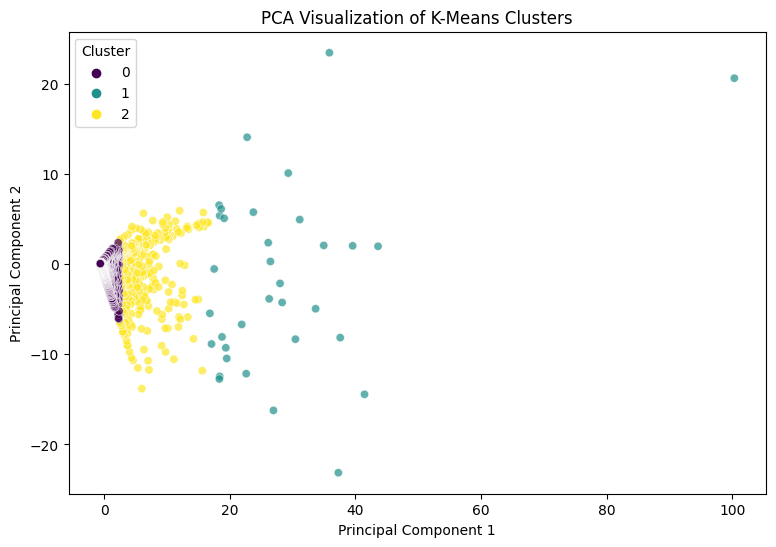

In [14]:
# Adding a 2d projection for clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(9,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette="viridis", alpha=0.7)
plt.title("PCA Visualization of K-Means Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

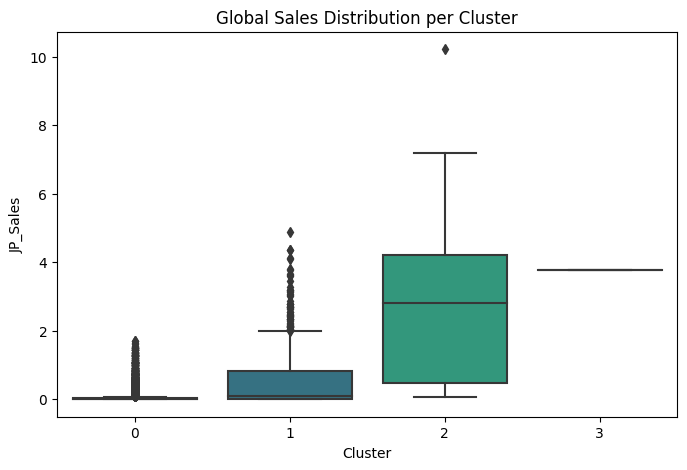

In [15]:
# Extra visualization for japan
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="JP_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

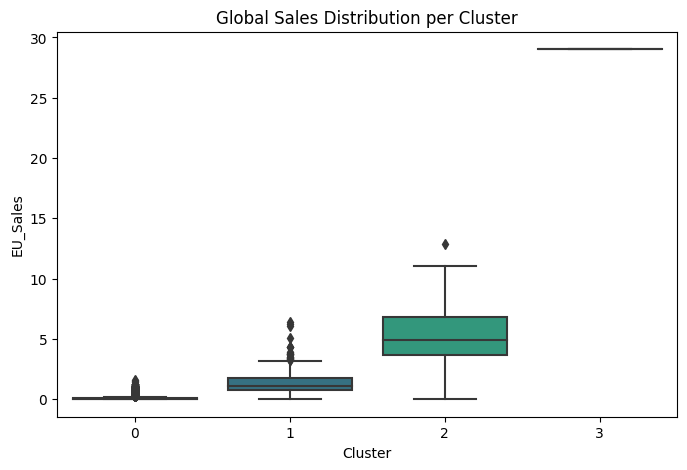

In [16]:
# Extra visualization for europe
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="EU_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

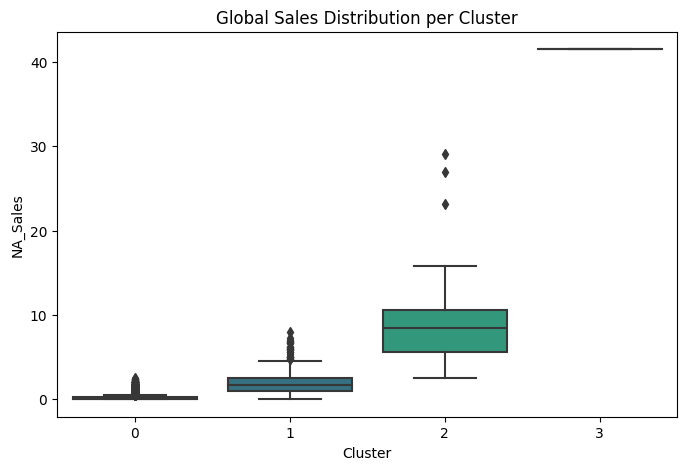

In [17]:
# Extra visualization for north america
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="NA_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

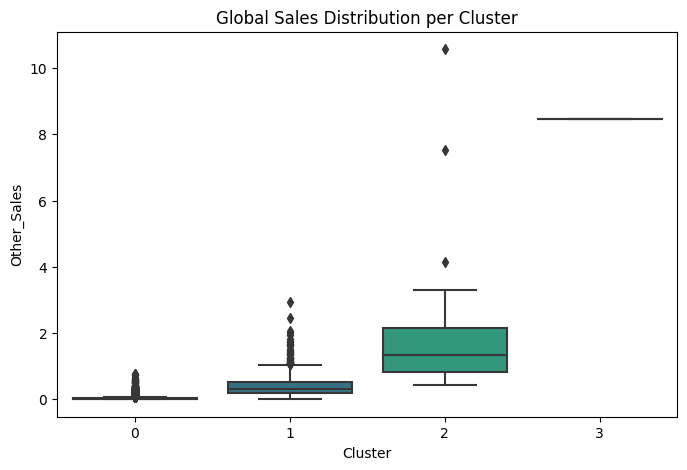

In [18]:
# Extra visualization for other regions
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="Other_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

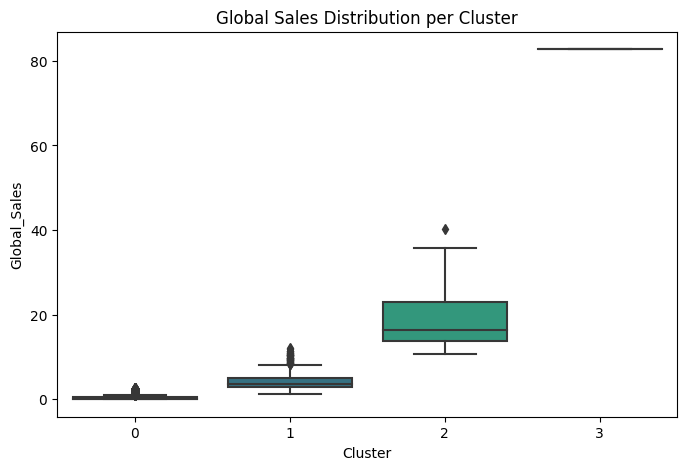

In [19]:
# Extra visualization for global sales
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="Global_Sales", data=df, palette="viridis")
plt.title("Global Sales Distribution per Cluster")
plt.show()

In [20]:
# Top games per clusters
for i in range(k):
    print(f"\nTop 3 games in Cluster {i}:")
    display(df[df["Cluster"]==i][["Name", "Global_Sales"]].sort_values(by="Global_Sales", ascending=False).head(3))


Top 3 games in Cluster 0:


,Name,Global_Sales
544,Missile Command,2.76
557,Madden NFL 11,2.69
555,Madden NFL 12,2.69



Top 3 games in Cluster 1:


,Name,Global_Sales
43,Halo 3,12.14
46,Super Mario 64,11.89
48,Super Mario Galaxy,11.52



Top 3 games in Cluster 2:


,Name,Global_Sales
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00



Top 3 games in Cluster 3:


,Name,Global_Sales
0,Wii Sports,82.74


# 14. Reflection

For this experiment I use K-Means Clustering to look for hidden patterns inside the video game sales data without using pre-labeled categories. This one is different because it helps to group all the same games by basing it on their sales around the world, while Linear and Logistic are only predicting a target variable. My objective was to see if the data can form a group, like global success games, hits, or even titles that didn't sell well. 

My first move in this experiment was setting up the model, but it was confusing because K-Means Clustering doesn't use "y-values" or any labeled column. It only works if it sees any similarities between features. I used different columns such as North America, Europe, Japan, and Other regions to help the model decide on how many clusters made the most sense. In order to see what number I implemented a method called the Elbow method, and it helped find the point that adding more clusters stops improving the results. In the end I decided to use a balanced number of clusters that show a clear separation in the visualizations.

After finishing training the model, I added a code Silhouette Score to see or measure how different the clusters are from each other. And the results came very strong, meaning all the groups are well defined and they are not overlapping that much. Also the PCA visualization contributed a lot in giving or showing the separation between clusters, and it made it easier to see or understand how the unique types of games were grouped together. This showed a combination of numeric and visual output, creating a clear image about how the data behaved.

Doing this experiment, I discovered that clustering doesn't always require labeled data to showcase inputs. Also, it showed me how important scaling features is before implementing K-Means, since different values can have an impact on the groupings. Regardless of the fact that the algorithm is not always about accuracy in the same way as classification, it still helped fit all the dataset into logical segments that show real-world trends. In summary, K-Means is a great tool for discovering patterns that are hidden inside the dataset, and because of this, I understand all the data from a broader, unsupervised perspective.